In [206]:
import pandas as pd
import numpy as np
import us
from cleanco import cleanco
from fuzzywuzzy import fuzz
import distance
import re
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
sp500_final = pd.read_csv('sp500_cleaned.csv',encoding='utf-8')

In [8]:
sp500_names = sp500_final['NAME']

In [82]:
def clean_name(x):
    x=str(x)
    x = x.replace("U.S.","")
    return cleanco(x).clean_name()

def calc_similarity(comp_name):
    high = 0
    company = comp_name
    for i,sp in sp500_names.iteritems():
        if 1-distance.jaccard(comp_name,sp) > .7:
            val = fuzz.ratio(comp_name, sp)
            if val > high:
                high = val
                company = sp
    return company, high

In [250]:
data = pd.read_csv('capstone-goldman-sachs/src/clean/macro/master_macro_cleaned_naics.csv',dtype=str, usecols=['CASE_SUBMITTED','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','TOTAL_WORKERS','SOC_NAME','SOC_CODE','NAICS_CLASSIFICATION'])
data.CASE_SUBMITTED = pd.to_datetime(data.CASE_SUBMITTED)
data['YEAR'] = data.CASE_SUBMITTED.apply(lambda x: x.year)
data=data[data.YEAR>=2010].copy(deep=True)
data['EMPLOYER_NAME']=data.EMPLOYER_NAME.apply(lambda x: str(x).upper())

In [251]:
data['CLEAN_NAME']=data.EMPLOYER_NAME.apply(clean_name)

In [252]:
clean_name_counts = data.CLEAN_NAME.value_counts()
data_names = data.CLEAN_NAME.unique()

In [253]:
comp_dict = {}
for name in data_names:
    comp, value = calc_similarity(name)
    if value > 94:
        if comp in comp_dict.keys():
            comp_dict[comp].add(name)
        else:
            comp_dict[comp]=set([name])
comp_dict

{'3M': {'3M'},
 'A.O. SMITH': {'A. O. SMITH', 'A.O. SMITH'},
 'ABBOTT LABORATORIES': {'ABBOTT LABORATORIES'},
 'ABBVIE': {'ABBVIE'},
 'ACCENTURE': {'ACCENTURE'},
 'ACUITY BRANDS': {'ACUITY BRANDS'},
 'ADOBE SYSTEMS': {'ADOBE SYSTEMS'},
 'ADVANCED MICRO DEVICES': {'ADVANCED MICRO DEVICES'},
 'AES': {'AES'},
 'AFFILIATED MANAGERS GROUP': {'AFFILIATED MANAGERS GROUP'},
 'AFLAC': {'AFLAC'},
 'AGILENT TECHNOLOGIES': {'AGILENT TECHNOLOGIES'},
 'AKAMAI TECHNOLOGIES': {'AKAMAI TECHNOLOGIES', 'AKMAMAI TECHNOLOGIES'},
 'ALBEMARLE': {'ALBEMARLE'},
 'ALEXANDRIA REAL ESTATE EQUITIES': {'ALEXANDRIA REAL ESTATE EQUITIES'},
 'ALEXION PHARMACEUTICALS': {'ALEXION PHARMACEUTICALS',
  'LEXICON PHARMACEUTICALS'},
 'ALIGN TECHNOLOGY': {'ALIGN TECHNOLOGY'},
 'ALLEGION': {'ALLEGION'},
 'ALLIANT ENERGY': {'ALLIANT ENERGY'},
 'ALPHABET': {'ALPHABET'},
 'ALTRIA GROUP': {'ATRIA GROUP'},
 'AMERICAN ELECTRIC POWER': {'AMERICAN ELECTRIC POWER'},
 'AMERICAN EXPRESS': {'AMERICAN EXPRESS'},
 'AMERICAN INTERNATIONAL GRO

In [254]:
reverse = {}
for final_name in comp_dict.keys():
    name_list = comp_dict[final_name]
    for name in name_list:
        reverse[name]=final_name
reverse

{'3M': '3M',
 'A. O. SMITH': 'A.O. SMITH',
 'A.O. SMITH': 'A.O. SMITH',
 'ABBOTT LABORATORIES': 'ABBOTT LABORATORIES',
 'ABBVIE': 'ABBVIE',
 'ACCENTURE': 'ACCENTURE',
 'ACUITY BRANDS': 'ACUITY BRANDS',
 'ADOBE SYSTEMS': 'ADOBE SYSTEMS',
 'ADVANCED MICRO DEVICES': 'ADVANCED MICRO DEVICES',
 'AES': 'AES',
 'AFFILIATED MANAGERS GROUP': 'AFFILIATED MANAGERS GROUP',
 'AFLAC': 'AFLAC',
 'AGILENT TECHNOLOGIES': 'AGILENT TECHNOLOGIES',
 'AKAMAI TECHNOLOGIES': 'AKAMAI TECHNOLOGIES',
 'AKMAMAI TECHNOLOGIES': 'AKAMAI TECHNOLOGIES',
 'ALBEMARLE': 'ALBEMARLE',
 'ALEXANDRIA REAL ESTATE EQUITIES': 'ALEXANDRIA REAL ESTATE EQUITIES',
 'ALEXION PHARMACEUTICALS': 'ALEXION PHARMACEUTICALS',
 'ALIGN TECHNOLOGY': 'ALIGN TECHNOLOGY',
 'ALLEGION': 'ALLEGION',
 'ALLIANT ENERGY': 'ALLIANT ENERGY',
 'ALPHABET': 'ALPHABET',
 'AMERICAN ELECTRIC POWER': 'AMERICAN ELECTRIC POWER',
 'AMERICAN EXPRESS': 'AMERICAN EXPRESS',
 'AMERICAN INTERNATIONAL GROUP': 'AMERICAN INTERNATIONAL GROUP',
 'AMERICAN WATER WORKS COMPANY'

In [326]:
common_names = ["STARBUCKS COFFEE","BLIZZARD ENTERTAINMENT","SPRINT","STAPLES","UBER TECHNOLOGIES","MCKINSEY & COMPANY, INC. UNITED STATES","TWITTER","GLOBALFOUNDRIES","THE BOSTON CONSULTING GROUP","RITE AID", "LINKEDIN","ERICSSON","BLOOMBERG","EMC","TATA CONSULTANCY SERVICES", "WIPRO", "UST GLOBAL","IGATE TECHNOLOGIES","SYNTEL CONSULTING","SATYAM COMPUTER SERVICES","FUJITSU AMERICA","MPHASIS","HEXAWARE TECHNOLOGIES","KPMG","NTT DATA", "L&T TECHNOLOGY SERVICES","MINDTREE","YAHOO","HTC GLOBAL SERVICES","HTC GLOBAL SERVICES","VMWARE"]
amazon_names = ["AMAZON CORPORATE","AMAZON WEB SERVICES"]
ibm_names = ["IBM INDIA PRIVATE","IBM","IBM INDIA","IBM INDIA PVT"]
alphabet_names = ["GOOGLE"]
qualcomm_names = ["QUALCOMM TECHNOLOGIES","QUALCOMM ATHEROS","QUALCOMM INNOVATION CENTER"]
bofa_names = ["BANK OF AMERICA N.A","MERRILL LYNCH"]
oracle_names = ["ORACLE AMERICA","ORACLE FINANCIAL SERVICES SOFTWARE"]
capgemini_names = ["CAPGEMINI FINANCIAL SERVICES USA","CAPGEMINI AMERICA", "CAPGEMINI"]
hcl_names = ["HCL GLOBAL SYSTEMS", "HCL AMERICA"]
walmart_names = ["WAL-MART ASSOCIATES"]
gs_names = ["GOLDMAN SACHS NEW JERSEY","GOLDMAN, SACHS","GOLDMAN SACHS SERVICES","GOLDMAN SACHS"]
capone_names = ["CAPITAL ONE SERVICES","CAPITAL ONE SERVICES II","CAPITAL ONE, NATIONAL ASSOCIATION"]
deloitte_names = ["DELOITTE FINANCIAL ADVISORY SERVICES","DELOITTE TRANSACTIONS AND BUSINESS ANALYTICS","DELOITTE &AMP; TOUCHE","DELOITTE TAX", "DELOITTE CONSULTING","DELOITTE & TOUCHE"] 
pwc_names = ["PRICEWATERHOUSECOOPERS ADVISORY SERVICES","PRICEWATERHOUSECOOPERS"]
cvs_names = ["CVS RX SERVICES","CVS PHARMACY"]
lt_names = ["LARSEN AND TOUBRO INFOTECH","LARSEN & TOUBRO","LARSEN & TOUBRO INFOTECH","LARSEN & TOUBRO TECHNOLOGY SERVICES"]
infosys_names = ["INFOSYTECH SOLUTIONS","INFOSYS BPO","INFOSYS TECHNOLOGIES","INFOSYS","INFOSYS PUBLIC SERVICES"]
ms_names = ["MORGAN STANLEY & CO","MORGAN STANLEY SERVICES GROUP"]
samsung_names = ["SAMSUNG RESEARCH AMERICA","SAMSUNG AUSTIN SEMICONDUCTOR","SAMSUNG INFORMATION SYSTEMS AMERICA","SAMSUNG TELECOMMUNICATIONS AMERICA","SAMSUNG ELECTRONICS AMERICA","SAMSUNG","SAMSUNG SEMICONDUCTOR"]
dell_names = ["DELL MARKETING","DELL","DELL USA","DELL PRODUCTS"]
mahindra_names = ["TECH MAHINDRA ( AMERICAS","TECH MAHINDRA (AMERICAS),INC", "TECH MAHINDRA (AMERICAS"]
citi_names = ["CITICORP CREDIT SERVICES, INC. (USA","CITIGROUP TECHNOLOGY","CITIBANK, N.A","CITIUSTECH","CITIGROUP GLOBAL MARKETS"]
verizon_names = ["VERIZON DATA SERVICES"]
hp_names = ["HEWLETT-PACKARD","HP ENTERPRISE SERVICES"]
att_names = ["AT&T SERVICES"]
comcast_names = ["COMCAST CABLE COMMUNICATIONS"]
blackrock_names = ["BLACKROCK FINANCIAL MANAGEMENT"]
fidelity_names = ["FIDELITY TECHNOLOGY GROUP"]
aa_names = ["AMERICAN AIRLINES"]
accenture_names = ["ACCENTURE TECHNOLOGY SOLUTIONS"]
jpm_names = ["JPMORGAN CHASE &AMP"]
ey_names = ["ERNST &AMP; YOUNG", "ERNST & YOUNG"]
tesla_names = ["TESLA MOTORS","TESLA"]
mastercard_names = ["MASTERCARD INTERNATIONAL"]
amex_names = ["AMERICAN EXPRESS TRAVEL RELATED SERVICES CO"]
def match_name(x):
    if str(x) == 'HEWLETT PACKARD ENTERPRISE':
        return "HP"
    elif str(x) in reverse.keys():
        return reverse[x]
    elif str(x) in common_names:
        return x
    elif str(x) in amazon_names:
        return "AMAZON.COM"
    elif str(x) in ibm_names:
        return "INTERNATIONAL BUSINESS MACHINES"
    elif str(x) in alphabet_names:
        return "ALPHABET"
    elif str(x) in bofa_names:
        return "BANK OF AMERICA"
    elif str(x) in qualcomm_names:
        return "QUALCOMM"
    elif str(x) in oracle_names:
        return "ORACLE"
    elif str(x) in capgemini_names:
        return "CAPGEMINI"
    elif str(x) in hcl_names:
        return "HCL"
    elif str(x) in walmart_names:
        return "WAL-MART STORES"
    elif str(x) in gs_names:
        return "GOLDMAN SACHS GROUP"
    elif str(x) in capone_names:
        return "CAPITAL ONE FINANCIAL"
    elif str(x) in deloitte_names:
        return "DELOITTE & TOUCHE"
    elif str(x) in pwc_names:
        return "PRICEWATERHOUSECOOPERS"
    elif str(x) in cvs_names:
        return "CVS HEALTH"
    elif str(x) in lt_names:
        return "LARSEN & TOUBRO"
    elif str(x) in infosys_names:
        return "INFOSYS"
    elif str(x) in ms_names:
        return "MORGAN STANLEY"
    elif str(x) in samsung_names:
        return "SAMSUNG"
    elif str(x) in dell_names:
        return "DELL"
    elif str(x) in mahindra_names:
        return "TECH MAHINDRA"
    elif str(x) in citi_names:
        return "CITIGROUP"
    elif str(x) in verizon_names:
        return "VERIZON COMMUNICATIONS"
    elif str(x) in hp_names:
        return "HP"
    elif str(x) in att_names:
        return "AT&T"
    elif str(x) in comcast_names:
        return "COMCAST"
    elif str(x) in blackrock_names:
        return "BLACKROCK"
    elif str(x) in fidelity_names:
        return "FIDELITY NATIONAL INFORMATION SERVICES"
    elif str(x) in aa_names:
        return "AMERICAN AIRLINES GROUP"
    elif str(x) in accenture_names:
        return "ACCENTURE"
    elif str(x) in jpm_names:
        return "JPMORGAN CHASE"
    elif str(x) in ey_names:
        return "ERNST & YOUNG"
    elif str(x) in tesla_names:
        return "TESLA MOTORS"
    elif str(x) in mastercard_names:
        return "MASTERCARD"
    elif str(x) in amex_names:
        return "AMERICAN EXPRESS"
    else:
        return None

In [331]:
data['MATCHED_NAME'] = data.CLEAN_NAME.apply(match_name)

In [332]:
relevant = data[~pd.isnull(data.MATCHED_NAME)].copy(deep=True)

In [333]:
date_soc = '[0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2}'
dot_soc = '[0-9]{2}-[0-9]{4}.[0-9]{2}'
dot_soc_1 = '[0-9]{2}-[0-9]{4}.[0-9]{1}'
rand_soc = '[0-9]{2}-[0-9]{4}\.'
right_soc = '[0-9]{2}-[0-9]{4}'

def clean_SOC(x):
    if pd.isnull(x):
        return x
    x=str(x).replace(' ','')
    if re.match(date_soc,x):
        return "{}-{}".format(x[x.index('-')+1:x.index('-')+3],x[:x.index('-')])
    elif re.match(dot_soc,x):
        return x[:-3]
    elif re.match(dot_soc_1,x):
        return x[:-2]
    elif re.match(rand_soc,x):
        return x[:x.index('.')]
    elif re.match(right_soc,x):
        return x
    else:
        return np.nan
def cat_SOC(x):
    if not pd.isnull(x):
        return x[:2]
    else:
        return x

In [334]:
relevant['CLEAN_SOC_CODE']=relevant.SOC_CODE.apply(clean_SOC)
relevant['SOC_CATEGORY']=relevant.CLEAN_SOC_CODE.apply(cat_SOC)

In [335]:
SOC_CODES = relevant.CLEAN_SOC_CODE.unique()
EMP_NAMES = relevant.MATCHED_NAME.unique()
SOC_CAT_CODES = relevant.SOC_CATEGORY.unique()
NAICS_CODES = relevant.NAICS_CLASSIFICATION.unique()

In [337]:
relevant_dfs=[]
relevant_dfs_detailed=[]
for year in range(2010,2018):
    temp_df = relevant[relevant.YEAR==year].copy(deep=True)
    empty_df = pd.DataFrame(columns=SOC_CAT_CODES, index=EMP_NAMES)
    empty_df_detailed = pd.DataFrame(columns=SOC_CODES, index=EMP_NAMES)
    for i, row in temp_df.iterrows():
        existing_val = empty_df.get_value(index=row.MATCHED_NAME, col=row.SOC_CATEGORY)
        existing_val_detailed = empty_df_detailed.get_value(index=row.MATCHED_NAME, col=row.CLEAN_SOC_CODE)
        if np.isnan(float(existing_val)):
            empty_df.set_value(index=row.MATCHED_NAME, col=row.SOC_CATEGORY, value=float(row.TOTAL_WORKERS))
        else:
            empty_df.set_value(index=row.MATCHED_NAME, col=row.SOC_CATEGORY, value=existing_val+float(row.TOTAL_WORKERS))
        if np.isnan(float(existing_val_detailed)):
            empty_df_detailed.set_value(index=row.MATCHED_NAME, col=row.CLEAN_SOC_CODE, value=float(row.TOTAL_WORKERS))
        else:
            empty_df_detailed.set_value(index=row.MATCHED_NAME, col=row.CLEAN_SOC_CODE, value=existing_val+float(row.TOTAL_WORKERS))
    relevant_dfs.append(empty_df.fillna(0))
    relevant_dfs_detailed.append(empty_df_detailed.fillna(0))
len(relevant_dfs)

8

In [338]:
relevant

,CASE_SUBMITTED,EMPLOYER_CITY,EMPLOYER_NAME,EMPLOYER_STATE,NAICS_CLASSIFICATION,SOC_CODE,SOC_NAME,TOTAL_WORKERS,YEAR,CLEAN_NAME,MATCHED_NAME,CLEAN_SOC_CODE,SOC_CATEGORY
3267635,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15
3267642,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15
3267643,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15
3267644,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15
3267645,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1051,Computer Systems Analysts,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1051,15
3267646,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15
3267647,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",27-1024,Graphic Designers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,27-1024,27
3267648,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1051,Computer Systems Analysts,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1051,15
3267651,2010-01-01,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15
3267671,2010-01-03,PLANO,INFOSYS TECHNOLOGIES LIMITED,TX,"Software Publishers, Computer Services",15-1021,Computer Programmers,25.0,2010.0,INFOSYS TECHNOLOGIES,INFOSYS,15-1021,15


In [339]:
naics_df = pd.DataFrame(columns=NAICS_CODES, index=EMP_NAMES)
for i, row in relevant.iterrows():
    naics_df.set_value(index=row.MATCHED_NAME, col=row.NAICS_CLASSIFICATION, value=1)

In [340]:
total_df = relevant_dfs[-1]
year = 2010
for item in relevant_dfs[:len(relevant_dfs)-1]:
    diff = int((2017-year)/2)
    decay = 1*np.power((1-.4),diff)
    year+=1
    total_df = total_df + diff*item

In [341]:
total_df_detailed = relevant_dfs_detailed[-1]
year = 2010
for item in relevant_dfs_detailed[:len(relevant_dfs_detailed)-1]:
    diff = int((2017-year)/2)
    decay = 1*np.power((1-.4),diff)
    year+=1
    total_df_detailed = total_df_detailed + diff*item

In [342]:
sim_eucl = euclidean_distances(total_df)
cat_dict_euc={}
for i in range(len(sim_eucl)):
    name = EMP_NAMES[i]
    cat_dict_euc[name]=[]
    for j in range(len(sim_eucl[i])):
        cat_dict_euc[name].append((EMP_NAMES[j],sim_eucl[i][j]))
    cat_dict_euc[name].sort(key=lambda tup:tup[1], reverse=False)

In [343]:
sim_eucl_detailed = euclidean_distances(total_df_detailed)
cat_dict_euc_detailed={}
for i in range(len(sim_eucl)):
    name = EMP_NAMES[i]
    cat_dict_euc_detailed[name]=[]
    for j in range(len(sim_eucl_detailed[i])):
        cat_dict_euc_detailed[name].append((EMP_NAMES[j],sim_eucl_detailed[i][j]))
    cat_dict_euc_detailed[name].sort(key=lambda tup:tup[1], reverse=False)

In [344]:
sim_cos = cosine_similarity(total_df)
cat_dict_cos={}
for i in range(len(sim_cos)):
    name = EMP_NAMES[i]
    cat_dict_cos[name]=[]
    for j in range(len(sim_cos[i])):
        cat_dict_cos[name].append((EMP_NAMES[j],sim_cos[i][j]))
    cat_dict_cos[name].sort(key=lambda tup:tup[1], reverse=True)

In [345]:
sim_cos_detailed = cosine_similarity(total_df_detailed)
cat_dict_cos_detailed={}
for i in range(len(sim_cos_detailed)):
    name = EMP_NAMES[i]
    cat_dict_cos_detailed[name]=[]
    for j in range(len(sim_cos_detailed[i])):
        cat_dict_cos_detailed[name].append((EMP_NAMES[j],float(sim_cos_detailed[i][j])))
    cat_dict_cos_detailed[name].sort(key=lambda tup:tup[1], reverse=True)

In [346]:
import copy

sim_eucl_detailed_mod = copy.deepcopy(sim_eucl_detailed)
for i in range(len(sim_eucl_detailed)):
    sim_eucl_detailed_mod[i] = 1-(sim_eucl_detailed_mod[i]/max(sim_eucl_detailed_mod[i]))

In [347]:
sim_weighted_detailed=(sim_eucl_detailed_mod+sim_cos_detailed)/2

In [348]:
sim_cos_detailed

array([[  1.00000000e+00,   7.47058782e-02,   7.91466721e-01, ...,
          0.00000000e+00,   4.41609845e-03,   0.00000000e+00],
       [  7.47058782e-02,   1.00000000e+00,   8.78758782e-02, ...,
          5.60957298e-02,   4.98628709e-02,   6.23285886e-03],
       [  7.91466721e-01,   8.78758782e-02,   1.00000000e+00, ...,
          9.15964972e-05,   4.57982486e-05,   2.28991243e-05],
       ..., 
       [  0.00000000e+00,   5.60957298e-02,   9.15964972e-05, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.41609845e-03,   4.98628709e-02,   4.57982486e-05, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   6.23285886e-03,   2.28991243e-05, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [349]:
def find_eucl_detailed(x):
    last = cat_dict_euc_detailed[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [350]:
interact(find_eucl_detailed, x=list(cat_dict_euc_detailed.keys()))

<function __main__.find_eucl_detailed>

In [351]:
def find_eucl(x):
    last = cat_dict_euc[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [352]:
interact(find_eucl, x=list(cat_dict_euc.keys()))

<function __main__.find_eucl>

In [353]:
def find_cos(x):
    last = cat_dict_cos[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [354]:
interact(find_cos, x=list(cat_dict_euc.keys()))

<function __main__.find_cos>

In [355]:
def find_cos_detailed(x):
    last = cat_dict_cos_detailed[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [356]:
interact(find_cos_detailed, x=list(cat_dict_euc_detailed.keys()))

<function __main__.find_cos_detailed>

In [357]:
cat_dict_weighted_detailed={}
for i in range(len(sim_weighted_detailed)):
    name = EMP_NAMES[i]
    cat_dict_weighted_detailed[name]=[]
    for j in range(len(sim_weighted_detailed[i])):
        cat_dict_weighted_detailed[name].append((EMP_NAMES[j],float(sim_weighted_detailed[i][j])))
    cat_dict_weighted_detailed[name].sort(key=lambda tup:tup[1], reverse=True)

In [358]:
def find_weighted_detailed(x):
    last = cat_dict_weighted_detailed[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [359]:
interact(find_weighted_detailed, x=list(cat_dict_weighted_detailed.keys()))

<function __main__.find_weighted_detailed>

In [376]:
short_cat_detailed = {}
for x in cat_dict_weighted_detailed.keys():
    last = cat_dict_weighted_detailed[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    short_cat_detailed[x]=final

In [366]:
emp_naic={}
for i, row in relevant.iterrows():
    if row.MATCHED_NAME in emp_naic.keys():
        emp_naic[row.MATCHED_NAME].add(row.NAICS_CLASSIFICATION)
    else:
        emp_naic[row.MATCHED_NAME] = set([row.NAICS_CLASSIFICATION])

In [367]:
emp_naic

{'3M': {'Manufacturing - Computers & Electronics',
  'Manufacturing - Other',
  'Other'},
 'A.O. SMITH': {'Manufacturing - Computers & Electronics',
  'Manufacturing - Other'},
 'ABBOTT LABORATORIES': {'Manufacturing - Computers & Electronics'},
 'ABBVIE': {'Manufacturing - Computers & Electronics'},
 'ACCENTURE': {'Management, Consulting & Technical Services', 'Other'},
 'ACUITY BRANDS': {'Manufacturing - Other'},
 'ADOBE SYSTEMS': {'Software Publishers, Computer Services'},
 'ADVANCED MICRO DEVICES': {'Manufacturing - Other',
  'Software Publishers, Computer Services'},
 'AES': {'Manufacturing - Other',
  'Other',
  'Software Publishers, Computer Services'},
 'AFFILIATED MANAGERS GROUP': {'Finance, Insurance, Real Estate'},
 'AFLAC': {'Finance, Insurance, Real Estate'},
 'AGILENT TECHNOLOGIES': {'Manufacturing - Other'},
 'AKAMAI TECHNOLOGIES': {'Software Publishers, Computer Services'},
 'ALBEMARLE': {'Trade, Transportation, Warehousing'},
 'ALEXANDRIA REAL ESTATE EQUITIES': {'Finan

In [396]:
total = 0
for name in short_cat_detailed.keys():
    temp = 0
    relevant_naics = emp_naic[name]
    similar_names = short_cat_detailed[name]
    for sim_name, value in similar_names:
        temp2 = 0
        sim_naics = emp_naic[sim_name]
        for sn in sim_naics:
            if sn in relevant_naics:
                temp2=1
        temp+=temp2
    ratio = float(temp)/10.0
    total+=ratio

In [378]:
total/len(short_cat_detailed)

0.4347945205479453

In [383]:
def evaluate(eucl, cos, eucl_weight, cos_weight, EMP_NAMES, emp_naic):
    weighted = get_weighted_sim(eucl, cos, eucl_weight, cos_weight)
    long_cat = get_long_cat(weighted, EMP_NAMES)
    short_cat = get_short_cat(long_cat)
    return get_evaluation_ratio(short_cat, emp_naic)

def get_weighted_sim(sim_eucl_detailed_mod, sim_cos_detailed, eucl_weight, cos_weight):
    return (eucl_weight*sim_eucl_detailed_mod)+(cos_weight*sim_cos_detailed)

def get_long_cat(sim_weighted_detailed, EMP_NAMES):
    cat_dict_weighted_detailed={}
    for i in range(len(sim_weighted_detailed)):
        name = EMP_NAMES[i]
        cat_dict_weighted_detailed[name]=[]
        for j in range(len(sim_weighted_detailed[i])):
            cat_dict_weighted_detailed[name].append((EMP_NAMES[j],float(sim_weighted_detailed[i][j])))
        cat_dict_weighted_detailed[name].sort(key=lambda tup:tup[1], reverse=True)
    return cat_dict_weighted_detailed

def get_short_cat(cat_dict_weighted_detailed):
    short_cat_detailed = {}
    for x in cat_dict_weighted_detailed.keys():
        last = cat_dict_weighted_detailed[x][:11]
        final=[]
        for (i, j) in last:
            if i!=x:
                final.append((i,j))
        short_cat_detailed[x]=final
    return short_cat_detailed

def get_evaluation_ratio(short_cat_detailed, emp_naic):
    total = 0
    for name in short_cat_detailed.keys():
        temp = 0
        relevant_naics = emp_naic[name]
        similar_names = short_cat_detailed[name]
        for sim_name, value in similar_names:
            temp2 = 0
            sim_naics = emp_naic[sim_name]
            for sn in sim_naics:
                if sn in relevant_naics:
                    temp2=1
            temp+=temp2
        ratio = float(temp)/10.0
        total+=ratio
    return total/len(short_cat_detailed)

In [393]:
ratios = np.arange(0,1,.05)
results = []
for r in ratios:
    results.append(evaluate(sim_eucl_detailed_mod, sim_cos_detailed, r, 1-r, EMP_NAMES, emp_naic))

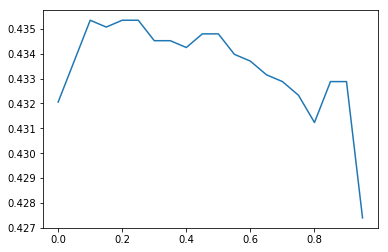

In [394]:
import matplotlib.pyplot as plt
plt.plot(ratios,results)
plt.show()

In [395]:
results

[0.4320547945205481,
 0.4336986301369865,
 0.4353424657534249,
 0.43506849315068513,
 0.43534246575342483,
 0.43534246575342483,
 0.43452054794520567,
 0.43452054794520567,
 0.4342465753424659,
 0.43479452054794543,
 0.4347945205479453,
 0.4339726027397262,
 0.4336986301369865,
 0.433150684931507,
 0.4328767123287672,
 0.43232876712328777,
 0.43123287671232907,
 0.43287671232876745,
 0.4328767123287673,
 0.4273972602739729]

In [398]:
sim_weighted_detailed=(.2*sim_eucl_detailed_mod)+ (.8*sim_cos_detailed)

In [400]:
cat_dict_weighted_detailed={}
for i in range(len(sim_weighted_detailed)):
    name = EMP_NAMES[i]
    cat_dict_weighted_detailed[name]=[]
    for j in range(len(sim_weighted_detailed[i])):
        cat_dict_weighted_detailed[name].append((EMP_NAMES[j],float(sim_weighted_detailed[i][j])))
    cat_dict_weighted_detailed[name].sort(key=lambda tup:tup[1], reverse=True)

In [401]:
def find_weighted_detailed(x):
    last = cat_dict_weighted_detailed[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [409]:
interact(find_weighted_detailed, x=sorted(list(cat_dict_weighted_detailed.keys())))

<function __main__.find_weighted_detailed>

In [408]:
company_list = list(cat_dict_weighted_detailed.keys())
sorted(company_list)

['3M',
 'A.O. SMITH',
 'ABBOTT LABORATORIES',
 'ABBVIE',
 'ACCENTURE',
 'ACUITY BRANDS',
 'ADOBE SYSTEMS',
 'ADVANCED MICRO DEVICES',
 'AES',
 'AFFILIATED MANAGERS GROUP',
 'AFLAC',
 'AGILENT TECHNOLOGIES',
 'AKAMAI TECHNOLOGIES',
 'ALBEMARLE',
 'ALEXANDRIA REAL ESTATE EQUITIES',
 'ALEXION PHARMACEUTICALS',
 'ALIGN TECHNOLOGY',
 'ALLEGION',
 'ALLIANT ENERGY',
 'ALPHABET',
 'ALTRIA GROUP',
 'AMAZON.COM',
 'AMERICAN AIRLINES GROUP',
 'AMERICAN ELECTRIC POWER',
 'AMERICAN EXPRESS',
 'AMERICAN INTERNATIONAL GROUP',
 'AMERICAN WATER WORKS COMPANY',
 'AMERIPRISE FINANCIAL',
 'AMERISOURCEBERGEN',
 'AMETEK',
 'AMGEN',
 'AMPHENOL',
 'ANADARKO PETROLEUM',
 'ANALOG DEVICES',
 'ANSYS',
 'ANTHEM',
 'APACHE',
 'APPLE',
 'APPLIED MATERIALS',
 'ARCONIC',
 'ARTHUR J. GALLAGHER',
 'ASSURANT',
 'AT&T',
 'AUTODESK',
 'AUTOMATIC DATA PROCESSING',
 'AUTOZONE',
 'AVALONBAY COMMUNITIES',
 'AVERY DENNISON',
 'BALL',
 'BANK OF AMERICA',
 'BB&T',
 'BECTON DICKINSON',
 'BEST BUY CO',
 'BIOGEN',
 'BLACKROCK',
 'BL